In [10]:
import numpy as np

V = 5

# Create adjacency list
Adj = [[] for i in range(V)]

# Function to insert vertices
# to adjacency list
def insert(adj, u, v):
 
    # Insert a vertex v to vertex u
    adj[u].append(v)
    return

insert(Adj, 0, 1)
insert(Adj, 1, 0)
insert(Adj, 1, 2)
insert(Adj, 2, 1)
insert(Adj, 2, 3)
insert(Adj, 2, 4)
insert(Adj, 3, 2)
insert(Adj, 4, 2)

print(Adj)

[[1], [0, 2], [1, 3, 4], [2], [2]]


In [12]:
# Function to convert adjacency
# list to adjacency matrix
def convert(adj, V):
 
    # Initialize a matrix
    matrix = [[0 for j in range(V)]
                 for i in range(V)]
     
    for i in range(V):
        for j in adj[i]:
            matrix[i][j] = 1
     
    return matrix

# Convert Adj to adjacency matrix
A = convert(Adj, V)

# Add self-connections by adding the identity
B = A + np.identity(V)

B

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.]])

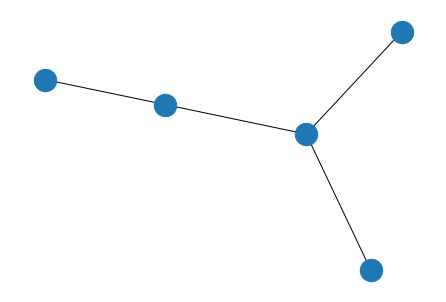

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def show_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500)
    plt.show()
    
show_graph(np.asarray(A))

In [15]:
d = 10
dout = 3

# Feature matrix X
X = np.random.randn(n,d)

# Weight matrix W
W = np.random.rand(d,dout)

In [16]:
# Ouput from 1st pass of GNN
Y = np.matmul(B,np.matmul(X,W))

# Add activation function
# Softmax, each row sums to 1
def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X), axis=1)
    return expo / expo_sum[:,None]

out = softmax(Y)

print(Y, '\n')
print(out)

[[-0.2904372   2.22711571  0.07970867]
 [-2.2651525   1.15704332 -0.77378928]
 [ 2.05774019  2.98972362  1.55523772]
 [ 0.25561552 -0.380385    0.51285224]
 [ 0.42493671  1.37448709  0.68319345]] 

[[0.06735746 0.83511259 0.09752995]
 [0.02771637 0.84913569 0.12314794]
 [0.24128037 0.61274144 0.14597818]
 [0.35426361 0.18754912 0.45818728]
 [0.20495085 0.52970518 0.26534396]]


In [20]:
choices = np.zeros_like(out)

for i in range(V):
    k = np.random.choice(dout, p=out[i])
    choices[i,k] = 1

print(choices)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
